# Titanic

# 1. Import Libraries and Packages

In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings("ignore")

# 2. Loding and Viewing Data Set

In [100]:
df_train = pd.read_csv("./train.csv")
df_test = pd.read_csv("./test.csv")

In [101]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [102]:
df_train.describe() # 숫자형인 변수의 정보

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


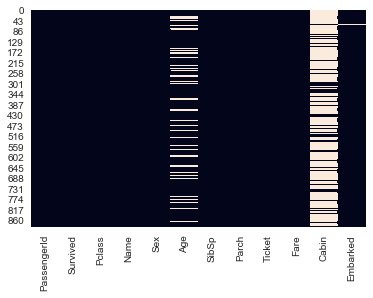

In [103]:
sns.heatmap(df_train.isnull(), cbar=False)
plt.savefig('./image/train_heatmap')
df_train.info() # 모든 변수의 간단한 정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


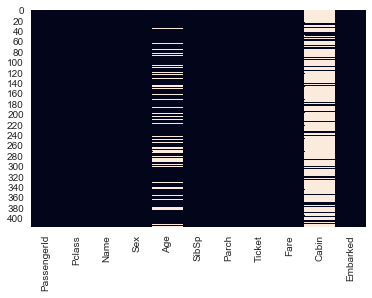

In [104]:
sns.heatmap(df_test.isnull(), cbar=False)
plt.savefig('./image/test_heatmap')
df_test.info() # 모든 변수의 간단한 정보

In [105]:
# 변수들의 이름
print(df_train.keys())
print(df_test.keys())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


# 3. Dealing with NaN Values(Impuation)

In [106]:
# train, test에 null값이 몇 개 있는지 확인
def null_table(train, test):
    print("Train Data Frame")
    print(pd.isnull(train).sum())
    print("")
    print("Test Data Fram")
    print(pd.isnull(test).sum())
    
null_table(df_train, df_test)

Train Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Test Data Fram
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [107]:
# 정규표현식으로 .앞에 글자만 뽑아낸다.
# Title이라는 변수를 생성해 넣어준다.
for name in df_train['Name']:
    df_train['Title'] = df_train['Name'].str.extract('([A-Za-z]+\.)',expand=True)

for name in df_test['Name']:
    df_test['Title'] = df_test['Name'].str.extract('([A-Za-z]+\.)',expand=True)

In [108]:
# 여러 직업?의 명칭은 Other로 바꿔준다.
title_replacements = {"Mlle.": "Other.", "Major.": "Other.", "Col.": "Other.", "Sir.": "Other.", "Don.": "Other.", "Mme.": "Other.",
          "Jonkheer.": "Other.", "Lady.": "Other.", "Capt.": "Other.", "Countess.": "Other.", "Ms.": "Other.", "Dona.": "Other.", "Rev.": "Other.", "Dr.": "Other."}

df_train.replace({"Title": title_replacements}, inplace=True)
df_test.replace({"Title": title_replacements}, inplace=True)

# 5개로 분류해준다. 
df_train.loc[df_train["Title"] == "Miss.", "Title"] = 0
df_train.loc[df_train["Title"] == "Mr.", "Title"] = 1
df_train.loc[df_train["Title"] == "Mrs.", "Title"] = 2
df_train.loc[df_train["Title"] == "Master.", "Title"] = 3
df_train.loc[df_train["Title"] == "Other.", "Title"] = 4

df_test.loc[df_test["Title"] == "Miss.", "Title"] = 0
df_test.loc[df_test["Title"] == "Mr.", "Title"] = 1
df_test.loc[df_test["Title"] == "Mrs.", "Title"] = 2
df_test.loc[df_test["Title"] == "Master.", "Title"] = 3
df_test.loc[df_test["Title"] == "Other.", "Title"] = 4

In [109]:
df_train.Title.unique()

array([1, 2, 0, 3, 4], dtype=object)

In [110]:
miss_md = df_train[df_train.Title == 0].median().Age
mr_md = df_train[df_train.Title == 1].median().Age
mrs_md = df_train[df_train.Title == 2].median().Age
master_md = df_train[df_train.Title == 3].median().Age
other_md = df_train[df_train.Title == 4].median().Age

In [111]:
miss_md

21.0

In [112]:
df_train.loc[(df_train['Title'] == 0) & (df_train.Age.isnull() == True), 'Age'] = miss_md
df_train.loc[(df_train['Title'] == 1) & (df_train.Age.isnull() == True), 'Age'] = mr_md
df_train.loc[(df_train['Title'] == 2) & (df_train.Age.isnull() == True), 'Age'] = mrs_md
df_train.loc[(df_train['Title'] == 3) & (df_train.Age.isnull() == True), 'Age'] = master_md
df_train.loc[(df_train['Title'] == 4) & (df_train.Age.isnull() == True), 'Age'] = other_md

df_test.loc[(df_test['Title'] == 0) & (df_test.Age.isnull() == True), 'Age'] = miss_md
df_test.loc[(df_test['Title'] == 1) & (df_test.Age.isnull() == True), 'Age'] = mr_md
df_test.loc[(df_test['Title'] == 2) & (df_test.Age.isnull() == True), 'Age'] = mrs_md
df_test.loc[(df_test['Title'] == 3) & (df_test.Age.isnull() == True), 'Age'] = master_md
df_test.loc[(df_test['Title'] == 4) & (df_test.Age.isnull() == True), 'Age'] = other_md


In [113]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,4
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.0,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [114]:
null_table(df_train, df_test)

Train Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

Test Data Fram
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64


In [115]:
df_test[df_test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,1


In [116]:
df_train.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [128]:
from collections import Counter

c = Counter(df_train['Embarked'])
print(c)
print(c.most_common())

Counter({'S': 644, 'C': 168, 'Q': 77, nan: 2})
[('S', 644), ('C', 168), ('Q', 77), (nan, 2)]


In [129]:
df_train.Embarked.fillna("S", inplace=True)

In [130]:
null_table(df_train, df_test)

Train Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

Test Data Fram
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64


In [131]:
df_test.Fare.fillna(df_train.Fare.median(), inplace=True)

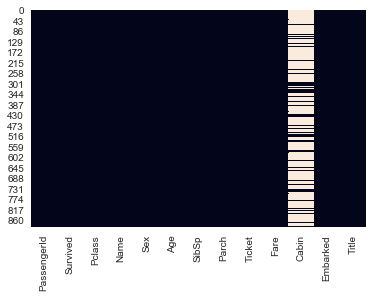

In [132]:
sns.heatmap(df_train.isnull(), cbar=False)

In [133]:
train = df_train.copy()
test = df_test.copy()

In [134]:
null_table(train, test)

Train Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

Test Data Fram
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
dtype: int64


In [135]:
train.drop(labels = ['Cabin', 'Ticket'], axis = 1, inplace=True)
test.drop(labels = ['Cabin', 'Ticket'], axis = 1, inplace=True)

null_table(train, test)

Train Data Frame
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
dtype: int64

Test Data Fram
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
dtype: int64


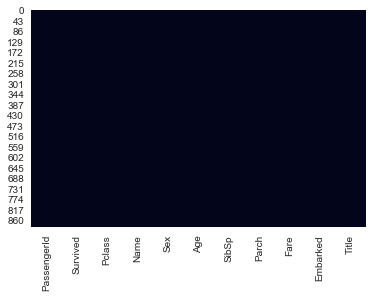

In [137]:
sns.heatmap(train.isnull(), cbar=False)
plt.savefig('./image/train_')

# 4. Plotting and Visualizing Data

### Gender

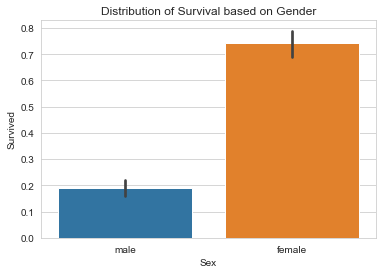

<Figure size 432x288 with 0 Axes>

In [24]:
import matplotlib.image as mpimg

img = sns.barplot(x='Sex', y='Survived', data=train)
plt.title('Distribution of Survival based on Gender')
plt.show()

plt.savefig('./image/Gender.png')

### Class

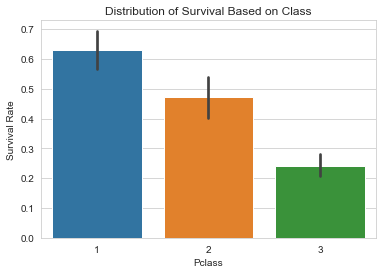

<Figure size 432x288 with 0 Axes>

In [25]:
sns.barplot(x='Pclass', y='Survived', data=train)
plt.ylabel('Survival Rate')
plt.title('Distribution of Survival Based on Class')
plt.show()
plt.savefig('./image/class')

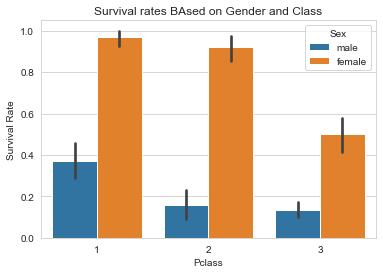

In [26]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train)
plt.ylabel('Survival Rate')
plt.title('Survival rates BAsed on Gender and Class')
plt.savefig('./image/class and gender')

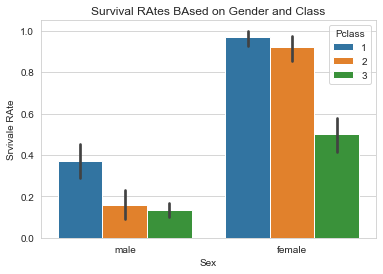

In [27]:
sns.barplot(x='Sex',y='Survived', hue='Pclass', data=train)
plt.ylabel('Srvivale RAte')
plt.title('Survival RAtes BAsed on Gender and Class')
plt.savefig('./image/class and gender')

### Age

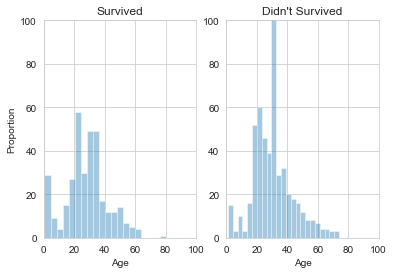

<Figure size 432x288 with 0 Axes>

In [28]:
survived_ages = train[train.Survived == 1]['Age']
not_survived_ages = train[train.Survived == 0]['Age']

plt.subplot(121)
sns.distplot(survived_ages, kde=False)
plt.axis([0,100,0,100])
plt.title('Survived')
plt.ylabel('Proportion')

plt.subplot(122)
sns.distplot(not_survived_ages, kde=False)
plt.axis([0,100,0,100])
plt.title("Didn't Survived")
plt.show()

plt.savefig("./image/age sucrvived & didn't survived")

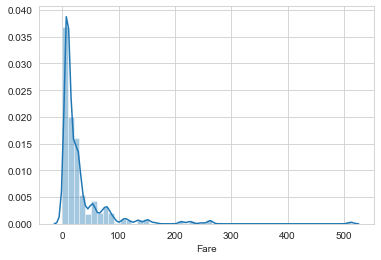

In [29]:
sns.distplot(train.Fare)
plt.savefig('./image/fare')

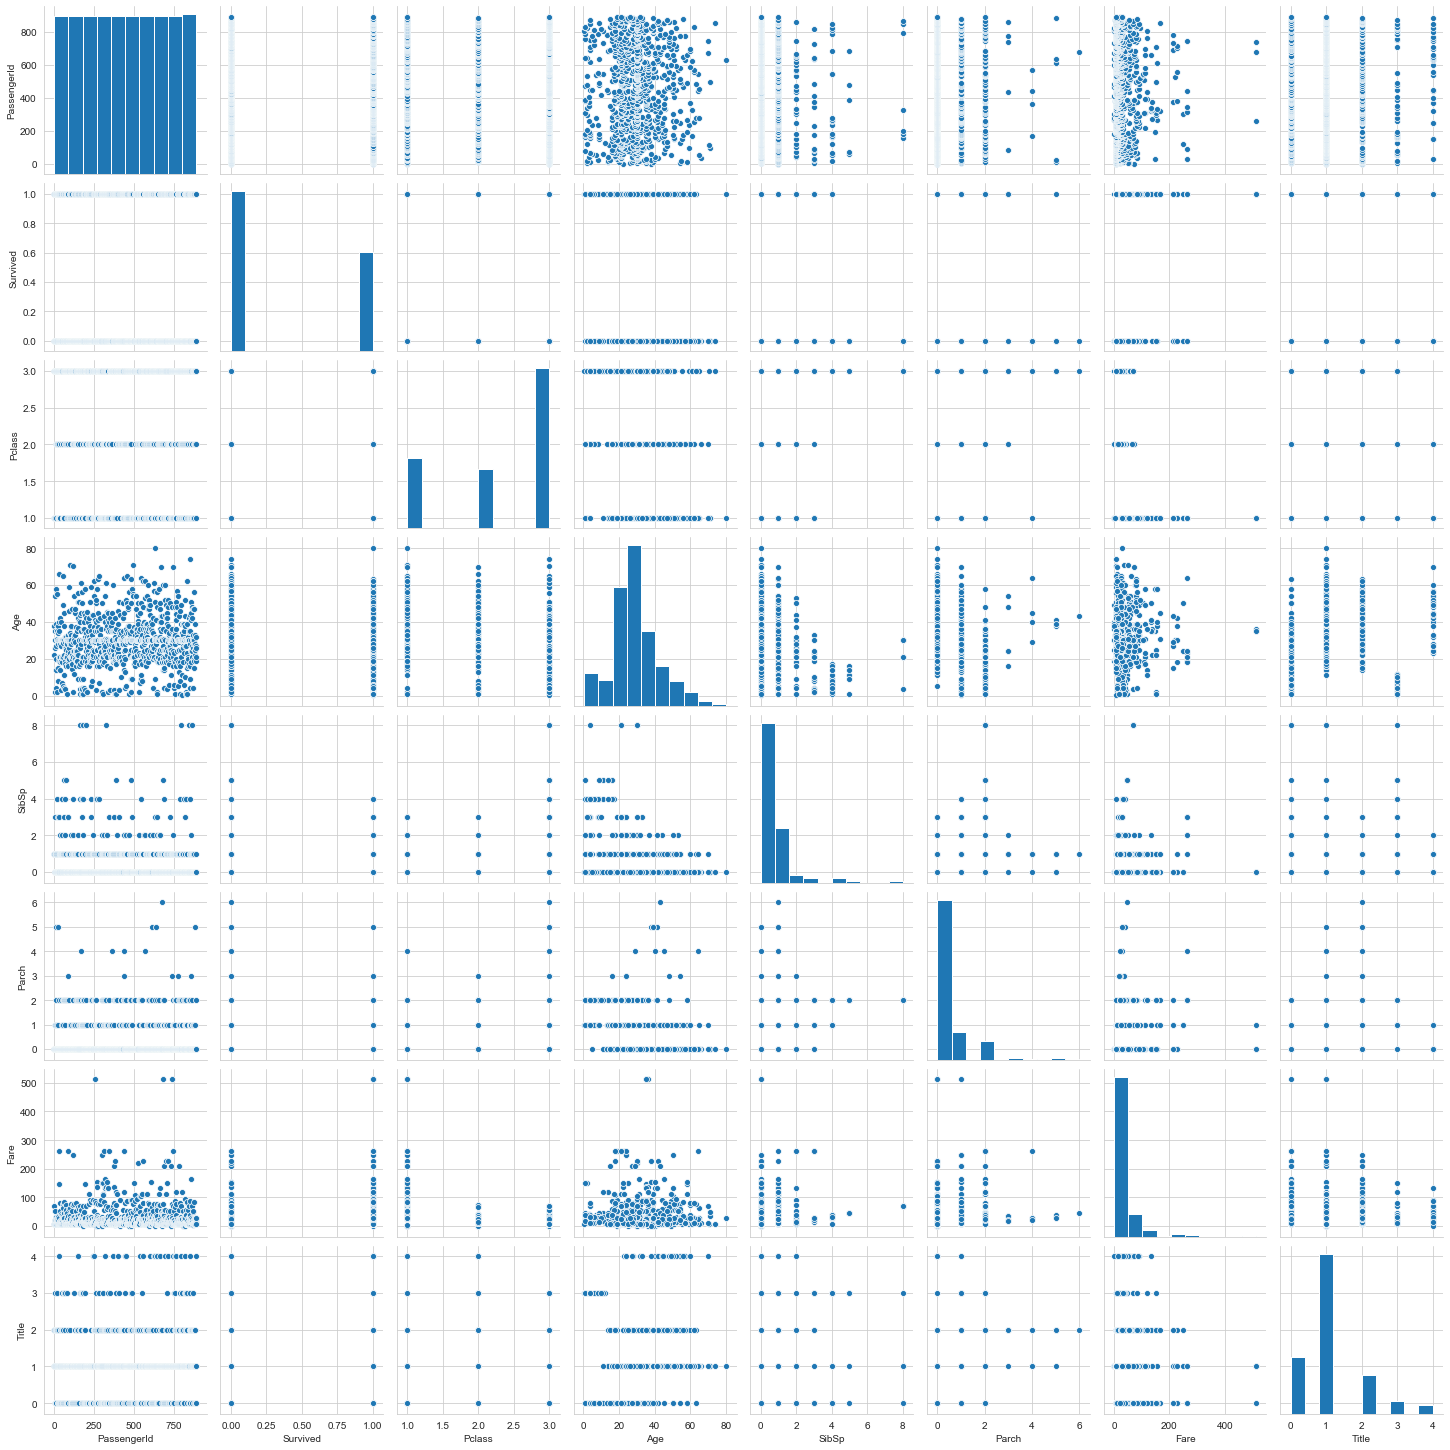

In [30]:
sns.pairplot(train)
plt.savefig('./image/pairplot')

### 5. Feature Engineering

In [31]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,56.4958,S,1
410,411,0,3,"Sdycoff, Mr. Todor",male,30.0,0,0,7.8958,S,1
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,3.5,1,1,15.2458,C,3
725,726,0,3,"Oreskovic, Mr. Luka",male,20.0,0,0,8.6625,S,1
758,759,0,3,"Theobald, Mr. Thomas Leonard",male,34.0,0,0,8.0500,S,1


In [32]:
test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
303,1195,3,"Pokrnic, Mr. Tome",male,24.0,0,0,8.6625,S,1
311,1203,3,"Vartanian, Mr. David",male,22.0,0,0,7.2250,C,1
213,1105,2,"Howard, Mrs. Benjamin (Ellen Truelove Arman)",female,60.0,1,0,26.0000,S,2
336,1228,2,"de Brito, Mr. Jose Joaquim",male,32.0,0,0,13.0000,S,1
243,1135,3,"Hyman, Mr. Abraham",male,30.0,0,0,7.8875,S,1


In [33]:
train.loc[train['Sex'] == 'male', 'Sex'] = 0
train.loc[train['Sex'] == 'female', 'Sex'] = 1

train.loc[train['Embarked'] == 'S', 'Embarked'] = 0
train.loc[train['Embarked'] == 'C', 'Embarked'] = 1
train.loc[train['Embarked'] == 'Q', 'Embarked'] = 2

test.loc[test['Sex'] == 'male', 'Sex'] = 0
test.loc[test['Sex'] == 'female', 'Sex'] = 1

test.loc[test['Embarked'] == 'S', 'Embarked'] = 0
test.loc[test['Embarked'] == 'C', 'Embarked'] = 1
test.loc[test['Embarked'] == 'Q', 'Embarked'] = 2

In [34]:
test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
268,1160,3,"Howard, Miss. May Elizabeth",1,21.0,0,0,8.0500,0,0
410,1302,3,"Naughton, Miss. Hannah",1,21.0,0,0,7.7500,2,0
349,1241,2,"Walcroft, Miss. Nellie",1,31.0,0,0,21.0000,0,0
223,1115,3,"Karlsson, Mr. Einar Gervasius",0,21.0,0,0,7.7958,0,1
113,1005,3,"Buckley, Miss. Katherine",1,18.5,0,0,7.2833,2,0


In [35]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
204,205,1,3,"Cohen, Mr. Gurshon ""Gus""",0,18.0,0,0,8.0500,0,1
723,724,0,2,"Hodges, Mr. Henry Price",0,50.0,0,0,13.0000,0,1
80,81,0,3,"Waelens, Mr. Achille",0,22.0,0,0,9.0000,0,1
389,390,1,2,"Lehmann, Miss. Bertha",1,17.0,0,0,12.0000,1,0
509,510,1,3,"Lang, Mr. Fang",0,26.0,0,0,56.4958,0,1


In [36]:
train['FamSize'] = train.SibSp + train.Parch + 1
test['FamSize'] = test.SibSp + test.Parch + 1

In [37]:
train['IsAlone'] = train.FamSize.apply(lambda x:1 if x == 1 else 0)
test['IsAlone'] = test.FamSize.apply(lambda x:1 if x == 1 else 0)

In [38]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamSize,IsAlone
760,761,0,3,"Garfirth, Mr. John",0,30.0,0,0,14.5000,0,1,1,1
677,678,1,3,"Turja, Miss. Anna Sofia",1,18.0,0,0,9.8417,0,0,1,1
588,589,0,3,"Gilinski, Mr. Eliezer",0,22.0,0,0,8.0500,0,1,1,1
420,421,0,3,"Gheorgheff, Mr. Stanio",0,30.0,0,0,7.8958,1,1,1,1
79,80,1,3,"Dowdell, Miss. Elizabeth",1,30.0,0,0,12.4750,0,0,1,1


In [39]:
train.loc[train['Age'] < 10, 'Age'] = 0
train.loc[(train['Age'] >= 10) & (train['Age'] < 20), 'Age'] = 1
train.loc[(train['Age'] >= 20) & (train['Age'] < 30), 'Age'] = 2
train.loc[(train['Age'] >= 30) & (train['Age'] < 40), 'Age'] = 3
train.loc[(train['Age'] >= 40) & (train['Age'] < 50), 'Age'] = 4
train.loc[(train['Age'] >= 50) & (train['Age'] < 60), 'Age'] = 5
train.loc[(train['Age'] >= 60) & (train['Age'] < 70), 'Age'] = 6
train.loc[(train['Age'] >= 70) & (train['Age'] < 80), 'Age'] = 7
train.loc[(train['Age'] >= 80), 'Age'] = 8

In [40]:
print(set(train['Age']))
train.sample(5)


{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0}


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamSize,IsAlone
272,273,1,2,"Mellinger, Mrs. (Elizabeth Anne Maidment)",1,4.0,0,1,19.500,0,2,2,0
241,242,1,3,"Murphy, Miss. Katherine ""Kate""",1,2.0,1,0,15.500,2,0,2,0
167,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",1,4.0,1,4,27.900,0,2,6,0
422,423,0,3,"Zimmerman, Mr. Leo",0,2.0,0,0,7.875,0,1,1,1
781,782,1,1,"Dick, Mrs. Albert Adrian (Vera Gillespie)",1,1.0,1,0,57.000,0,2,2,0


In [41]:
test.loc[test['Age'] < 10, 'Age'] = 0
test.loc[(test['Age'] >= 10) & (test['Age'] < 20), 'Age'] = 1
test.loc[(test['Age'] >= 20) & (test['Age'] < 30), 'Age'] = 2
test.loc[(test['Age'] >= 30) & (test['Age'] < 40), 'Age'] = 3
test.loc[(test['Age'] >= 40) & (test['Age'] < 50), 'Age'] = 4
test.loc[(test['Age'] >= 50) & (test['Age'] < 60), 'Age'] = 5
test.loc[(test['Age'] >= 60) & (test['Age'] < 70), 'Age'] = 6
test.loc[(test['Age'] >= 70) & (test['Age'] < 80), 'Age'] = 7
test.loc[(test['Age'] >= 80), 'Age'] = 8

In [42]:
print(set(test.Age))
test.sample(5)

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0}


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamSize,IsAlone
245,1137,1,"Kenyon, Mr. Frederick R",0,4.0,1,0,51.8625,0,1,2,0
402,1294,1,"Gibson, Miss. Dorothy Winifred",1,2.0,0,1,59.4000,1,0,2,0
161,1053,3,"Touma, Master. Georges Youssef",0,0.0,1,1,15.2458,1,3,3,0
237,1129,3,"Baccos, Mr. Raffull",0,2.0,0,0,7.2250,1,1,1,1
160,1052,3,"Smyth, Miss. Julia",1,2.0,0,0,7.7333,2,0,1,1


In [43]:
train.loc[train['Fare'] < 50, 'Fare'] = 0
train.loc[(train['Fare'] >= 50) & (train['Fare'] < 100), 'Fare'] = 1
train.loc[(train['Fare'] >= 100) & (train['Fare'] < 150), 'Fare'] = 2
train.loc[(train['Fare'] >= 150) & (train['Fare'] < 200), 'Fare'] = 3
train.loc[(train['Fare'] >= 200) & (train['Fare'] < 250), 'Fare'] = 4
train.loc[(train['Fare'] >= 250) & (train['Fare'] < 300), 'Fare'] = 5
train.loc[(train['Fare'] > 300), 'Fare'] = 6

In [44]:
print(set(train.Fare))

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0}


In [45]:
test.loc[test['Fare'] < 50, 'Fare'] = 0
test.loc[(test['Fare'] >= 50) & (test['Fare'] < 100), 'Fare'] = 1
test.loc[(test['Fare'] >= 100) & (test['Fare'] < 150), 'Fare'] = 2
test.loc[(test['Fare'] >= 150) & (test['Fare'] < 200), 'Fare'] = 3
test.loc[(test['Fare'] >= 200) & (test['Fare'] < 250), 'Fare'] = 4
test.loc[(test['Fare'] >= 250) & (test['Fare'] < 300), 'Fare'] = 5
test.loc[(test['Fare'] > 300), 'Fare'] = 6

In [46]:
print(set(train.Fare))

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0}


In [47]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamSize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,2.0,1,0,0.0,0,1,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,1.0,1,2,2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,2.0,0,0,0.0,0,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,3.0,1,0,1.0,0,2,2,0
4,5,0,3,"Allen, Mr. William Henry",0,3.0,0,0,0.0,0,1,1,1


# 6. Model Fitting and Predicting

### sklearn Models to Test

In [48]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [49]:
from sklearn.metrics import make_scorer, accuracy_score

In [50]:
from sklearn.model_selection import GridSearchCV

### Defining Features in train/test

In [51]:
features = ['Pclass', 'Sex', 'Age', 'Embarked', 'Fare', 'FamSize', 'IsAlone', 'Title']

x_train = train[features]
y_train = train['Survived']
x_test = test[features]

### Validation Data Set

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_valid, Y_train, Y_valid = train_test_split(x_train, y_train, test_size=0.3, random_state=42)

### Model Create Function

In [53]:
def create_model(model):
    model_clf = model()
    model_clf.fit(X_train, Y_train)
    pred_model = model_clf.predict(X_valid)
    acc_model = accuracy_score(Y_valid, pred_model)
    
    return acc_model

### SVC Model

In [54]:
acc_svc = create_model(SVC)
print(acc_svc)

0.8171641791044776


### LivearSVC

In [55]:
acc_linsvc = create_model(LinearSVC)
print(acc_linsvc)

0.7985074626865671


### RandomForest Model

In [56]:
acc_rf = create_model(RandomForestClassifier)
print(acc_rf)

0.8171641791044776


### LogisticRegression Model

In [57]:
acc_logreg = create_model(LogisticRegression)
print(acc_logreg)

0.7985074626865671


### KNeighbors Model

In [58]:
acc_knn = create_model(KNeighborsClassifier)
print(acc_knn)

0.7649253731343284


### GaussianNB Model

In [59]:
acc_gnb = create_model(GaussianNB)
print(acc_gnb)

0.8059701492537313


### DecisionTree Model

In [60]:
acc_dt = create_model(DecisionTreeClassifier)
print(acc_dt)

0.7798507462686567


# 7. Evaluating Model Performances

In [61]:
model_performance = pd.DataFrame({
    'Model':['SVC', 'Linear SVC', 'Random Forest', 'Logistic Regression', 'K Nearest Neighbors', 'Gaussian Naive Bayes' , 'Decision Tree'],
    'Accuracy':[acc_svc, acc_linsvc, acc_rf, acc_logreg, acc_knn, acc_gnb, acc_dt]
})

model_performance.sort_values(by = 'Accuracy', ascending=False)

,Model,Accuracy
0,SVC,0.817164
2,Random Forest,0.817164
5,Gaussian Naive Bayes,0.805970
1,Linear SVC,0.798507
3,Logistic Regression,0.798507
6,Decision Tree,0.779851
4,K Nearest Neighbors,0.764925


# 8. Tuning Parameters with GridSearchCV

In [62]:
# svc_clf = SVC()
# values = [0.001, 0.01, 0.1, 1, 10, 100,]
# parameters = {
#     'C':values,
#     'gamma':values
# }

# grid_cv = GridSearchCV(svc_clf, parameters, scoring = make_scorer(accuracy_score))
# grid_cv.fit(x_train, y_train)

# print('Our optimized Ranodm Forest model is : ')
# grid_cv.best_estimator_


# titanic2

In [63]:
from sklearn.model_selection import KFold

svc_clf = SVC()
values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 200, 1000]
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

parameters = {
    'C':values,
    'gamma':values
}

grid_cv = GridSearchCV(svc_clf, parameters, scoring = make_scorer(accuracy_score), cv = kfold)
grid_cv.fit(x_train, y_train)

print('Our optimized Ranodm Forest model is : ')
grid_cv.best_estimator_

# titinic3

Our optimized Ranodm Forest model is : 


SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [64]:
# svc_clf = SVC()
# values = [0.001, 0.01, 0.1, 1, 10, 100, 200]
# param_grid = [
#     {'C':values, 'gamma':values, 'kernel':['linear']},
#     {'C':values, 'gamma':values, 'kernel':['rbf']}
# ]

# grid_cv = GridSearchCV(svc_clf, param_grid=param_grid, scoring = make_scorer(accuracy_score), cv=10)
# grid_cv.fit(x_train, y_train)

# print('Our optimized Ranodm Forest model is : ')
# grid_cv.best_estimator_

# titanic4

In [65]:
grid_cv.best_score_

0.835019772770071

In [66]:
svc_clf = grid_cv.best_estimator_
svc_clf.fit(x_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# 9. Submission

In [67]:
submission_predictions = svc_clf.predict(x_test)

In [68]:
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': submission_predictions
})

submission.to_csv('test1.csv', index=False)
print(submission.shape)

(418, 2)


# 8-2. Tuning

In [69]:
# rf_clf = RandomForestClassifier()

# parameters = {
#     'n_estimators':[4,5,6,7,8,9,10,15],
#     'criterion':['gini','entropy'],
#     'max_features':['auto', 'sqrt', 'log2'],
#     'max_depth': [2,3,5,10],
#     'min_samples_split':[2,3,5,10],
#     'min_samples_leaf':[1,5,8,10]
# }

# grid_cv = GridSearchCV(rf_clf, parameters, scoring = make_scorer(accuracy_score))
# grid_cv = grid_cv.fit(x_train, y_train)

# print('Our optimized Random Forest model is : ')
# grid_cv.best_estimator_

In [70]:
from sklearn.model_selection import KFold

rf_clf = RandomForestClassifier()
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

parameters = {
    'n_estimators':[4,5,6,7,8,9,10,15],
    'criterion':['gini','entropy'],
    'max_features':['auto', 'sqrt', 'log2'],
    'max_depth': [2,3,5,10],
    'min_samples_split':[2,3,5,10],
    'min_samples_leaf':[1,5,8,10]
}

grid_cv = GridSearchCV(rf_clf, parameters, scoring = make_scorer(accuracy_score), cv=kfold)
grid_cv = grid_cv.fit(x_train, y_train)

print('Our optimized Random Forest model is : ')
grid_cv.best_estimator_

Our optimized Random Forest model is : 


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [71]:
grid_cv.best_score_

0.8428786642395331

In [72]:
rf_clf = grid_cv.best_estimator_
rf_clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [73]:
for name, score in zip(train[features], rf_clf.feature_importances_):
    print(name, score)

Pclass 0.17657043849785578
Sex 0.29343442919619445
Age 0.05972551339489232
Embarked 0.03882700591531518
Fare 0.060945831085034444
FamSize 0.08926393951518545
IsAlone 0.033252105276346845
Title 0.24798073711917562


# 9-2. Submission

In [74]:
submission_predictions = rf_clf.predict(x_test)

In [75]:
submission = pd.DataFrame({
    'PassengerId':test['PassengerId'],
    'Survived': submission_predictions
})

submission.to_csv('test_rf1.csv', index=False)
print(submission.shape)

(418, 2)


In [76]:
t1 = pd.read_csv('titanic3_submission.csv')
t2 = pd.read_csv('titanic7_submission.csv')

In [77]:
count = 0
for i in range(len(t1)):
    if t1.Survived[i] == t2.Survived[i]:
        count+=1
    else:
        print('X')
print(count)

X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
X
394
